<a href="https://colab.research.google.com/github/Mkr-mayank/CNN/blob/main/Prediction_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# pip install opencv-python

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [31]:
dataset_path = '/content/drive/MyDrive/Dataset4' #Ye tera drive link hai
# dataset_path = '/content/drive/MyDrive/Datasets/IMG_CLASSES' #Ye mera hai(Arijit)
IMG_SIZE = 128
BATCH_SIZE = 32

In [32]:
# img = cv2.imread()
# IMG_SIZE = cv2.resize(img, (128, 128))

In [33]:
# def resize_images(directory, target_size):
#     for folder in os.listdir(directory):
#         folder_path = os.path.join(directory, folder)
#         for file_name in os.listdir(folder_path):
#             file_path = os.path.join(folder_path, file_name)
#             img = Image.open(file_path)
#             img = img.resize(target_size, Image.ANTIALIAS)
#             img.save(file_path)

# # Here are the resized images
# resize_images(dataset_path, (IMG_SIZE, IMG_SIZE))

In [34]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 21028 images belonging to 1 classes.
Found 9011 images belonging to 1 classes.


In [35]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3),padding='same',),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Adjust this based on your dataset's number of classes
])

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,678,922 (6.40 MB)

 Trainable params: 1,677,130 (6.40 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [38]:
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen
)

Epoch 1/5
658/658 ━━━━━━━━━━━━━━━━━━━━ 6804s 10s/step - accuracy: 0.9801 - loss: 0.0710 - val_accuracy: 1.0000 - val_loss: 1.1121e-07
Epoch 2/5
658/658 ━━━━━━━━━━━━━━━━━━━━ 1973s 3s/step - accuracy: 1.0000 - loss: 1.4016e-05 - val_accuracy: 1.0000 - val_loss: 7.7921e-09
Epoch 3/5
658/658 ━━━━━━━━━━━━━━━━━━━━ 2016s 3s/step - accuracy: 1.0000 - loss: 3.4612e-06 - val_accuracy: 1.0000 - val_loss: 1.5478e-09
Epoch 4/5
658/658 ━━━━━━━━━━━━━━━━━━━━ 2078s 3s/step - accuracy: 1.0000 - loss: 3.9816e-06 - val_accuracy: 1.0000 - val_loss: 2.3813e-10
Epoch 5/5
658/658 ━━━━━━━━━━━━━━━━━━━━ 2054s 3s/step - accuracy: 1.0000 - loss: 9.2723e-07 - val_accuracy: 1.0000 - val_loss: 1.8521e-10


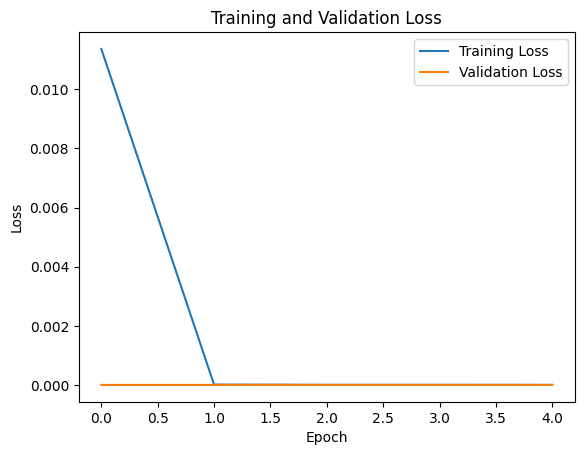

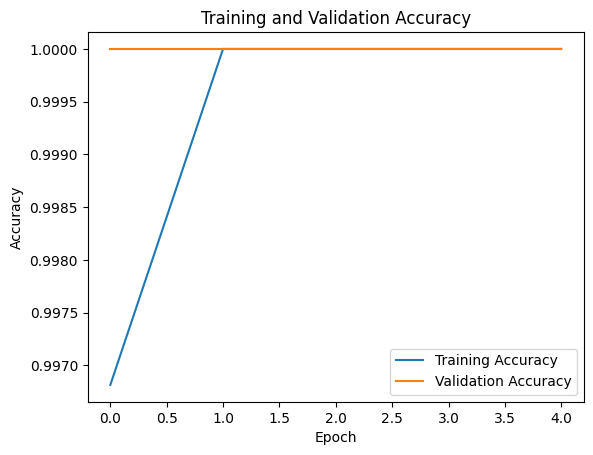

282/282 ━━━━━━━━━━━━━━━━━━━━ 266s 938ms/step - accuracy: 1.0000 - loss: 9.5814e-11
Validation Loss: 1.8521027767004483e-10
Validation Accuracy: 1.0
282/282 ━━━━━━━━━━━━━━━━━━━━ 218s 772ms/step
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


In [40]:
# import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(val_gen)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Predict labels
y_pred = model.predict(val_gen)
y_pred = np.argmax(y_pred, axis=1)

# True labels
y_true = val_gen.classes

# F1 Score, Precision, Recall
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


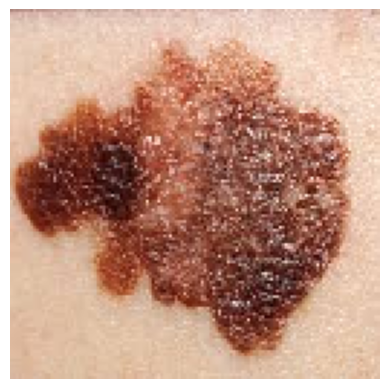

Prediction: [[1.0000000e+00 2.1731641e-11 2.0026352e-11 4.3237055e-12 1.4293528e-11
  1.0663866e-11 1.1793381e-11 3.7364944e-11 3.3905693e-13 3.3502534e-11]]
Predicted class: [0]


In [45]:
# import numpy as np
# import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
# from google.colab import drive

# Step 1: Mount Google Drive
# drive.mount('/content/drive')

# Step 2: Load the image from Google Drive
img_path = '/content/drive/MyDrive/test.jpeg'  # Replace with the actual path to your image in Google Drive

# Load the image
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))  # Replace IMG_HEIGHT and IMG_WIDTH with your model's input dimensions
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image data to 0-1 range if your model was trained this way

# Step 3: Make predictions using the already defined model
prediction = model.predict(img_array)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Step 4: Evaluate the result
print("Prediction:", prediction)
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class)
